# Cities Temperature Distribution

In [254]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
from datetime import datetime
from scipy.stats import entropy

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
from reliability.Fitters import Fit_Weibull_2P

from reliability.Probability_plotting import plot_points

from reliability.Distributions import Weibull_Distribution

import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False
from scipy.stats import entropy

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [255]:
df=pd.read_csv('ClimateData.csv').drop(columns=['Unnamed: 0'])

In [256]:
import haversine as hs 

In [257]:
city_df=df.drop_duplicates(subset='City')

In [258]:
CITIES=df.City.drop_duplicates().tolist()

In [259]:
import random

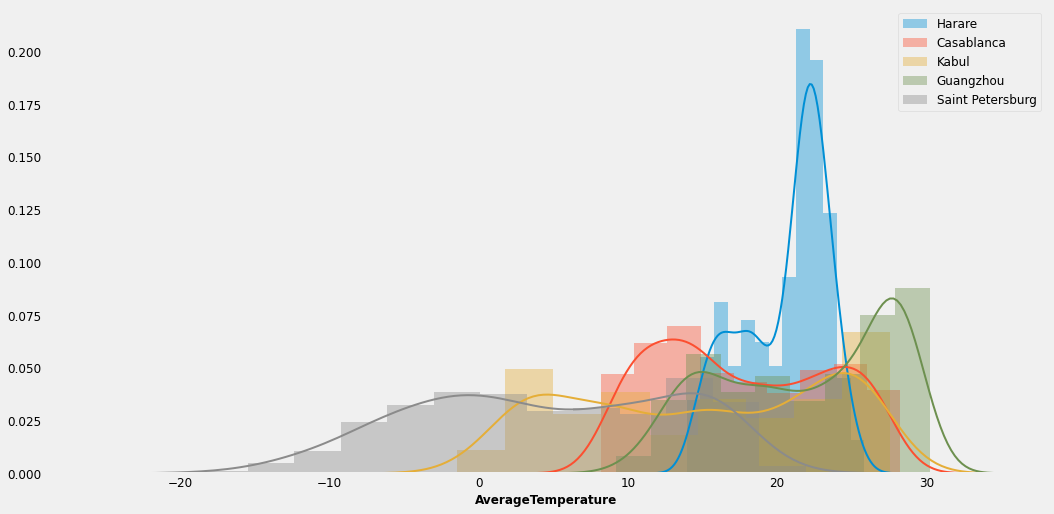

In [260]:
for j in range(5):
    k=random.choice(np.arange(0,len(CITIES)))
    sns.distplot(df[df['City']==CITIES[k]].AverageTemperature,label=CITIES[k])
plt.legend()

# KurtosisTest

In [261]:
from scipy.stats import kurtosistest


In [262]:
K=[]
P_K=[]
for c in CITIES:
    df_c=np.array(df[df['City']==c].AverageTemperature)
    K.append(kurtosistest(df_c)[0])
    P_K.append(kurtosistest(df_c)[1])

In [263]:
K_data=pd.DataFrame({'City':CITIES,'Kurtosis':K,'Kurtosis P-value':P_K})
K_data['IsGauss']=pass_k

In [264]:
pass_k=[]
for p in P_K:
    if p>=0.05:
        pass_k.append(1)
    else:
        pass_k.append(0)

In [265]:
K_data['IsGauss']=pass_k

In [270]:
K_data[K_data['IsGauss']==1.].head()

,City,Kurtosis,Kurtosis P-value,IsGauss
8,Bangkok,0.724759,0.468600,1
11,Bogotá,-0.658769,0.510044,1
13,Brasília,1.455182,0.145619,1
16,Cali,1.380371,0.167473,1
35,Ho Chi Minh City,-0.689529,0.490490,1


In [271]:
import folium
from folium.plugins import MarkerCluster
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc
import numpy as np
import imageio
import pandas as pd
import pathlib
import mapclassify as mc
import numpy as np
from geopy.geocoders import Nominatim

In [272]:
city_data=df[df['City'].isin(K_data[K_data['IsGauss']==1].City.tolist())]
city_data=city_data.drop_duplicates(subset='City')

In [273]:
world_map= folium.Map()
geolocator = Nominatim(user_agent="Piero")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(city_data)):
        lat = city_data.iloc[i]['Latitude']
        long = city_data.iloc[i]['Longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius,fill =True).add_to(marker_cluster)

In [274]:
world_map

# Skewness

In [275]:
from scipy.stats import skewtest

In [276]:
S=[]
P_S=[]
for c in CITIES:
    df_c=np.array(df[df['City']==c].AverageTemperature)
    S.append(skewtest(df_c)[0])
    P_S.append(skewtest(df_c)[1])
S_data=pd.DataFrame({'City':CITIES,'Skewness':S,'Skewness P-value':P_S})
pass_s=[]
for p in P_S:
    if p>=0.05:
        pass_s.append(1)
    else:
        pass_s.append(0)
S_data['IsGauss']=pass_s

In [277]:
S_data=pd.DataFrame({'City':CITIES,'Skewness':S,'Skewness P-value':P_S})

In [278]:
pass_s=[]
for p in P_S:
    if p>=0.05:
        pass_s.append(1)
    else:
        pass_s.append(0)

In [279]:
S_data['IsGauss']=pass_s

In [284]:
city_data=df[df['City'].isin(S_data[S_data['IsGauss']==1].City.tolist())]
city_data=city_data.drop_duplicates(subset='City')

In [285]:
world_map= folium.Map()
geolocator = Nominatim(user_agent="Piero")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(city_data)):
        lat = city_data.iloc[i]['Latitude']
        long = city_data.iloc[i]['Longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius,fill =True).add_to(marker_cluster)

In [286]:
world_map

In [282]:
K_data['IsGaussSkew']=S_data['IsGauss']

In [298]:
city_data=df[df['City'].isin(S_data[S_data['IsGauss']==1].City.tolist())]
city_data=city_data.drop_duplicates(subset='City')

In [312]:
K_and_s_data=city_data[city_data.City.isin(K_data[K_data.IsGauss==1].City.tolist())]

In [315]:
K_and_s_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
30833,1951-01-01,25.927,0.573,Jakarta,Indonesia,-6.175394,106.827183,1951,1
51140,1951-01-01,17.136,0.383,Nairobi,Kenya,-1.283253,36.817245,1951,1
56405,1951-01-01,23.152,0.819,Rangoon,Burma,16.796713,96.160992,1951,1
65430,1951-01-01,25.215,0.771,Singapore,Singapore,1.340863,103.830392,1951,1


In [313]:
world_map= folium.Map()
geolocator = Nominatim(user_agent="Piero")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(K_and_s_data)):
        lat = K_and_s_data.iloc[i]['Latitude']
        long = K_and_s_data.iloc[i]['Longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius,fill =True).add_to(marker_cluster)

In [314]:
world_map

In [316]:
all_good=K_and_s_data.City.tolist()

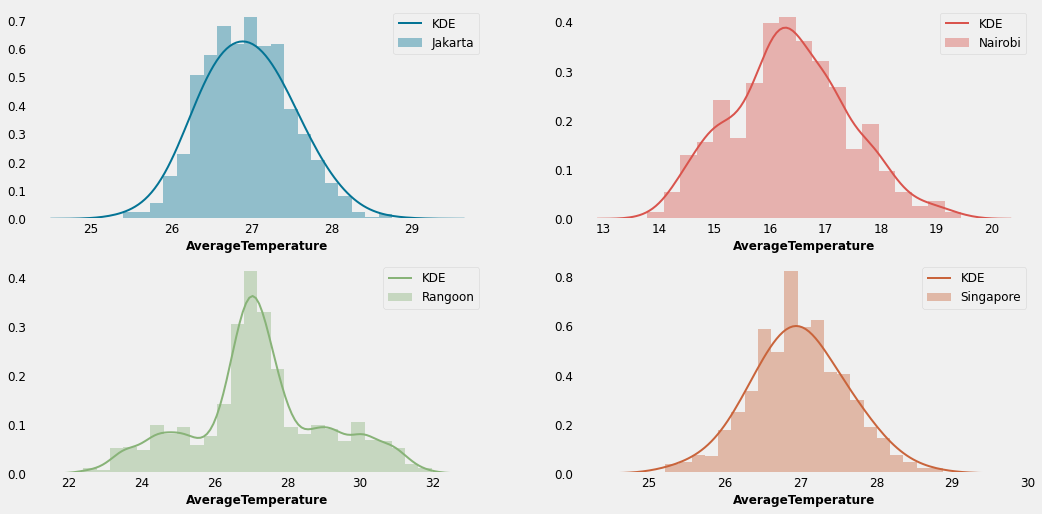

In [317]:
k=0
for city in all_good:
    k=k+1
    plt.subplot(2,2,k)
    gauss_df=gauss_data[gauss_data.City==city]
    sns.distplot(gauss_df.AverageTemperature,norm_hist=True,kde=False,color=colors[k],label=city)
    sns.kdeplot(gauss_df.AverageTemperature,color=colors[k],bw=0.3,label='KDE')
    #k=k+1
    #plt.hist(gauss_df.AverageTemperature,)
plt.show()

In [318]:
from scipy.stats import kstest

In [319]:
KS=[]
P_KS=[]
for c in CITIES:
    df_c=np.array(df[df['City']==c].AverageTemperature)
    KS.append(kstest(df_c,'norm')[0])
    P_KS.append(kstest(df_c,'norm')[1])

In [320]:
P_KS=np.array(P_KS)
KS_data=pd.DataFrame({'City':CITIES,'KS':KS,'P-value KS':P_KS})

In [321]:
KS_data=pd.DataFrame({'City':CITIES,'KS':KS,'P-value KS':P_KS})

In [327]:
KS_data['P-value KS'].max()

3.517655931577643e-222

# Seasons

In [334]:
import datetime as dt


In [341]:
df['season']=pd.DatetimeIndex(df['dt']).month%12 // 3 + 1

In [356]:
SEASON=[]
for s in range(1,5):
    SEASON.append(df[df.season==s])


# Skewness and Kurtosis

In [403]:
Test_data[Test_data.IsGaussSkew==1]
skew_city=Test_data[Test_data['IsGaussSkew']==1.].City.tolist()
K=[]
P_K=[]
for ci in skew_city:
    df_c=np.array(df[df['City']==ci].AverageTemperature)
    K.append(kurtosistest(df_c)[0])
    P_K.append(kurtosistest(df_c)[1])
pass_k=[]
for p in P_K:
    if p>=0.05:
        pass_k.append(1)
    else:
        pass_k.append(0)

In [413]:
Total_test_data=pd.DataFrame({'City':skew_city,'Kurtosis':K,'Kurtosis P-value':P_K})
Total_test_data=Total_test_data.reset_index()
Total_test_data['IsGauss']=pass_k
Total_test_data['Skewness']=Sk
Total_test_data['IsGaussSkew']=Sk_p

In [422]:
CITIES=df.City.drop_duplicates().tolist()
s_and_k_season=[]
for s in SEASON:
    df=s
    S=[]
    P_S=[]
    for c in CITIES:
        df_c=np.array(df[df['City']==c].AverageTemperature)
        S.append(skewtest(df_c)[0])
        P_S.append(skewtest(df_c)[1])
    Test_data=pd.DataFrame({'City':CITIES,'Skewness':S,'Skewness P-value':P_S})
    pass_s=[]
    for p in P_S:
        if p>=0.05:
            pass_s.append(1)
        else:
            pass_s.append(0)
    Test_data['IsGaussSkew']=pass_s
    Sk=Test_data[Test_data['IsGaussSkew']==1.].Skewness.tolist()
    Sk_p=Test_data[Test_data['IsGaussSkew']==1.]['Skewness P-value'].tolist()
    K=[]
    P_K=[]
    skew_city=Test_data[Test_data['IsGaussSkew']==1.].City.tolist()
    for ci in skew_city:
        df_c=np.array(df[df['City']==ci].AverageTemperature)
        K.append(kurtosistest(df_c)[0])
        P_K.append(kurtosistest(df_c)[1])
    pass_k=[]
    for p in P_K:
        if p>=0.05:
            pass_k.append(1)
        else:
            pass_k.append(0)
    Total_test_data=pd.DataFrame({'City':skew_city,'Kurtosis':K,'Kurtosis P-value':P_K})
    Total_test_data['IsGauss']=pass_k
    Total_test_data['Skewness']=Sk
    Total_test_data['IsGaussSkew']=Sk_p
    s_and_k_season.append(Total_test_data[Total_test_data['IsGauss']==1.])
    
    

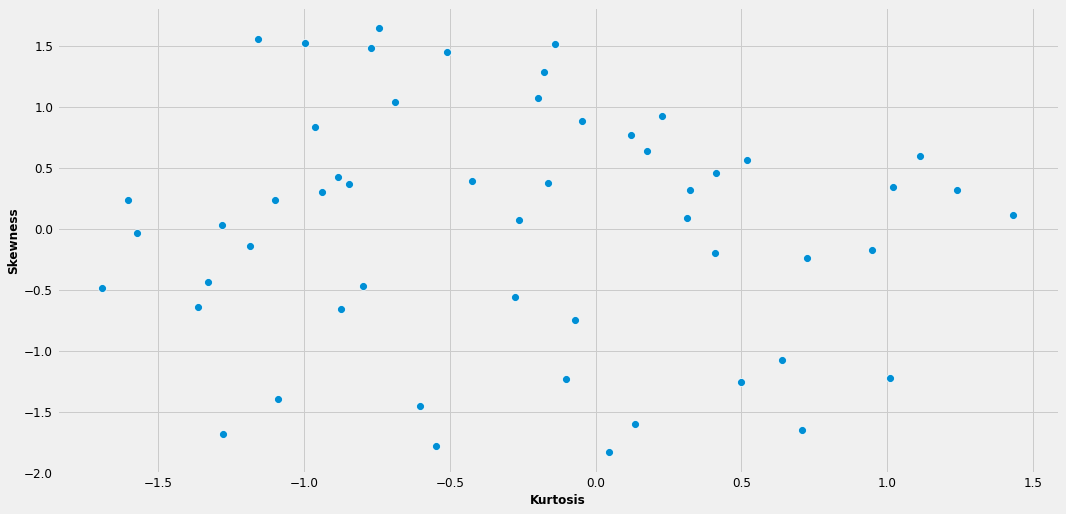

In [438]:
sns.scatterplot(x=s_and_k_season[0].Kurtosis,y=s_and_k_season[0].Skewness)
plt.grid(True)

In [550]:
df=pd.read_csv('ClimateData.csv').drop(columns=['Unnamed: 0'])
df['dt']=pd.to_datetime(df.dt)
df['season']=pd.DatetimeIndex(df['dt']).month%12 // 3 + 1

In [534]:
KS_clean=[]
KS_season=[]
for s in range(len(SEASON)):
    df_sea=df[df['season']==s+1]
    CITIES=s_and_k_season[s].City.tolist()
    #print(CITIES)
    KS=[]
    P_KS=[]
    for c in CITIES:
        df_c=np.array(df_sea[df_sea['City']==c].AverageTemperature)
        KS.append(kstest(df_c,'norm')[0])
        P_KS.append(kstest(df_c,'norm')[1])
    P_KS=np.array(P_KS)
    KS_data=pd.DataFrame({'City':CITIES,'KS':KS,'P-value KS':P_KS})
    KS_clean.append(KS_data[KS_data['P-value KS']>=0.05])
    KS_season.append(KS_data)

No KS passed values

In [491]:
ks_good=df[(df['season']==3) & (df.City=='Santiago')].AverageTemperature

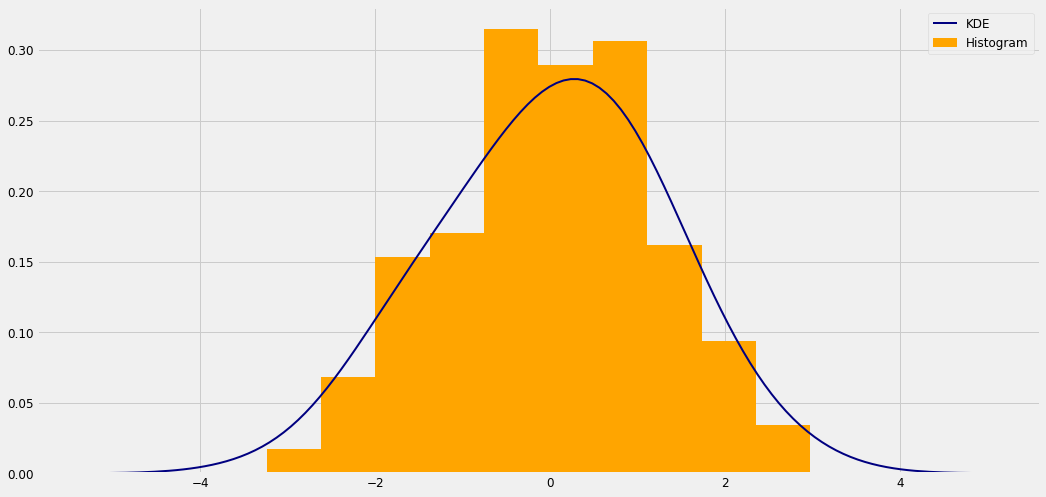

In [532]:
sns.kdeplot(df[(df['season']==3) & (df.City=='Santiago')].AverageTemperature,bw=0.7,color='navy',label='KDE')
plt.hist(df[(df['season']==3) & (df.City=='Santiago')].AverageTemperature,density=True,color='orange',label='Histogram')
plt.legend()
plt.grid(True)

In [554]:
YEARS=np.linspace(df.year.min(),df.year.max(),10).astype(int)

In [761]:
KS_tot_clean=[]
KS_tot_season=[]
for s in range(len(SEASON)):
    df_sea=df[df['season']==s+1]
    KS_clean=[]
    KS_season=[]
    for y in range(len(YEARS)-1):
        df_sea_y=df_sea[df_sea.year.isin(np.arange(YEARS[y],YEARS[y+1]))]
        CITIES=df_sea_y.City.drop_duplicates().tolist()
        #print(CITIES)
        KS=[]
        P_KS=[]
        for c in CITIES:
            df_c=np.array(df_sea_y[df_sea_y['City']==c].AverageTemperature)
            KS.append(kstest(df_c,'norm')[0])
            P_KS.append(kstest(df_c,'norm')[1])
        P_KS=np.array(P_KS)
        KS_data=pd.DataFrame({'City':CITIES,'KS':KS,'P-value KS':P_KS})
        KS_clean.append(KS_data[KS_data['P-value KS']>=0.05])
        KS_season.append(KS_data)
    KS_tot_clean.append(KS_clean)
    KS_tot_season.append(KS_season)

In [762]:
CITIES=df.City.drop_duplicates().tolist()

In [763]:
gaus_city=[]
when=[]
which_season=[]
for c in CITIES:
    for i in range(len(KS_tot_clean)):
        for j in range(len(KS_tot_clean[i])):
            if c in (KS_tot_clean[i][j].City.tolist()):
                gaus_city.append(c)
                when.append(j)
                which_season.append(i)

In [764]:
summary_data=pd.DataFrame({'CITY':gaus_city,'Time-range':when,'Season':which_season})

In [765]:
sum_drop=summary_data.drop_duplicates(subset='CITY',keep='first').reset_index()


In [766]:
def range_to_years(time_range):
    return np.arange(YEARS[time_range],YEARS[time_range+1],1)

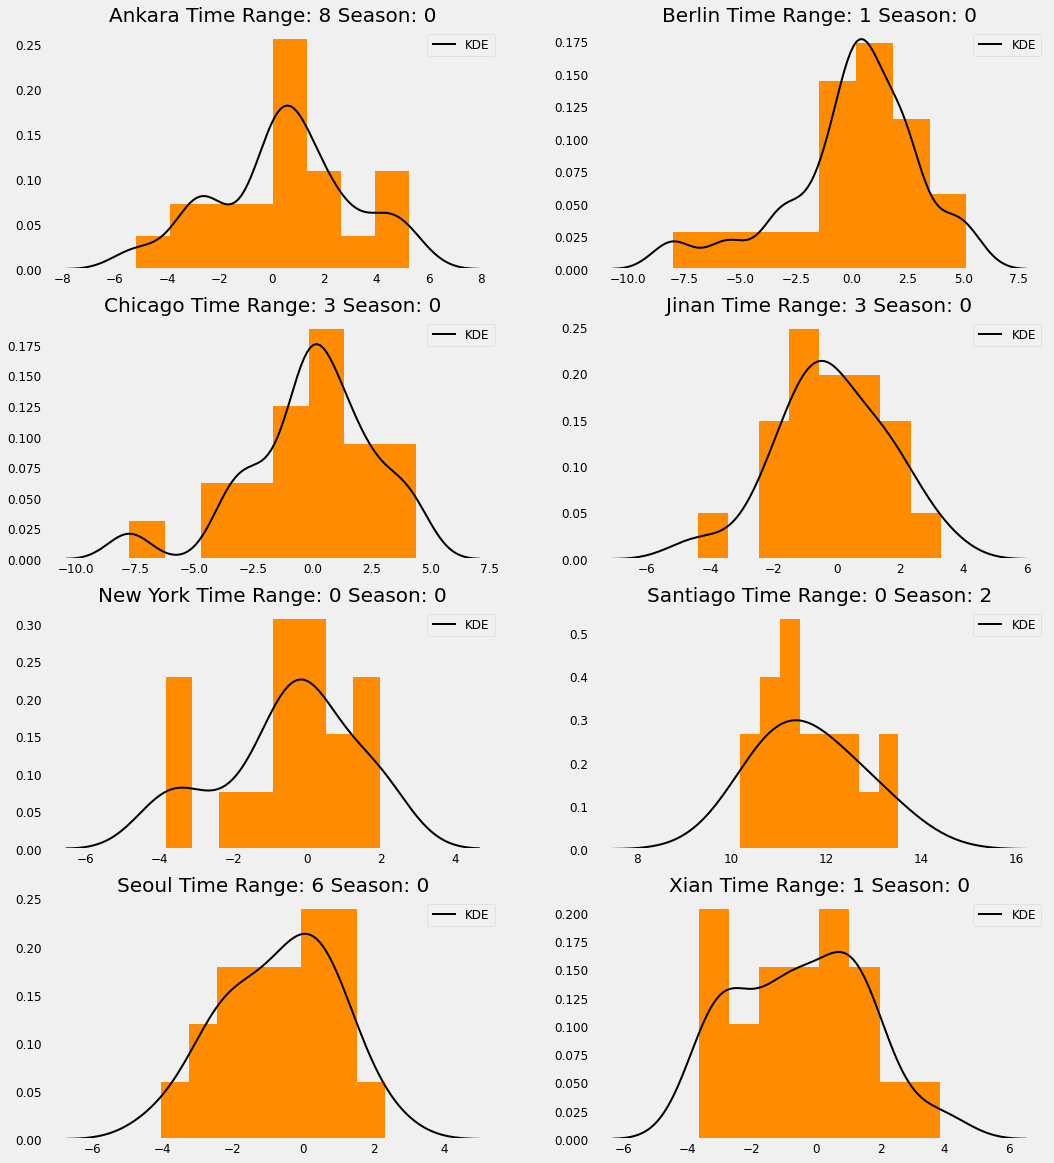

In [767]:
sum_drop=summary_data.drop_duplicates(subset='CITY').reset_index()
k=1
plt.subplots_adjust(top=2.)
for i in range(len(sum_drop)):
    ist=sum_drop.loc[i]
    dat=df[(df['City']==ist.CITY) & (df['year'].isin(range_to_years(ist['Time-range']))) & (df['season']==1)]
    val=dat.AverageTemperature
    plt.subplot(4,2,k)
    plt.title(str(ist.CITY)+' Time Range: '+str(ist['Time-range'])+' Season: '+ str(ist['Season']),fontsize=20)
    sns.kdeplot(val,label='KDE',bw=0.9,color='k')
    plt.hist(val,density=True,color='darkorange',bins=8)
    k=k+1

# 10%

In [768]:
KS_tot_clean=[]
KS_tot_season=[]
for s in range(len(SEASON)):
    df_sea=df[df['season']==s+1]
    KS_clean=[]
    KS_season=[]
    for y in range(len(YEARS)-1):
        df_sea_y=df_sea[df_sea.year.isin(np.arange(YEARS[y],YEARS[y+1]))]
        CITIES=df_sea_y.City.drop_duplicates().tolist()
        #print(CITIES)
        KS=[]
        P_KS=[]
        for c in CITIES:
            df_c=np.array(df_sea_y[df_sea_y['City']==c].AverageTemperature)
            KS.append(kstest(df_c,'norm')[0])
            P_KS.append(kstest(df_c,'norm')[1])
        P_KS=np.array(P_KS)
        KS_data=pd.DataFrame({'City':CITIES,'KS':KS,'P-value KS':P_KS})
        KS_clean.append(KS_data[KS_data['P-value KS']>=0.10])
        KS_season.append(KS_data)
    KS_tot_clean.append(KS_clean)
    KS_tot_season.append(KS_season)

In [769]:
CITIES=df.City.drop_duplicates().tolist()

In [770]:
gaus_city=[]
when=[]
which_season=[]
for c in CITIES:
    for i in range(len(KS_tot_clean)):
        for j in range(len(KS_tot_clean[i])):
            if c in (KS_tot_clean[i][j].City.tolist()):
                gaus_city.append(c)
                when.append(j)
                which_season.append(i)

In [771]:
summary_data=pd.DataFrame({'CITY':gaus_city,'Time-range':when,'Season':which_season})

In [772]:
sum_drop=summary_data.drop_duplicates(subset='CITY',keep='first').reset_index()


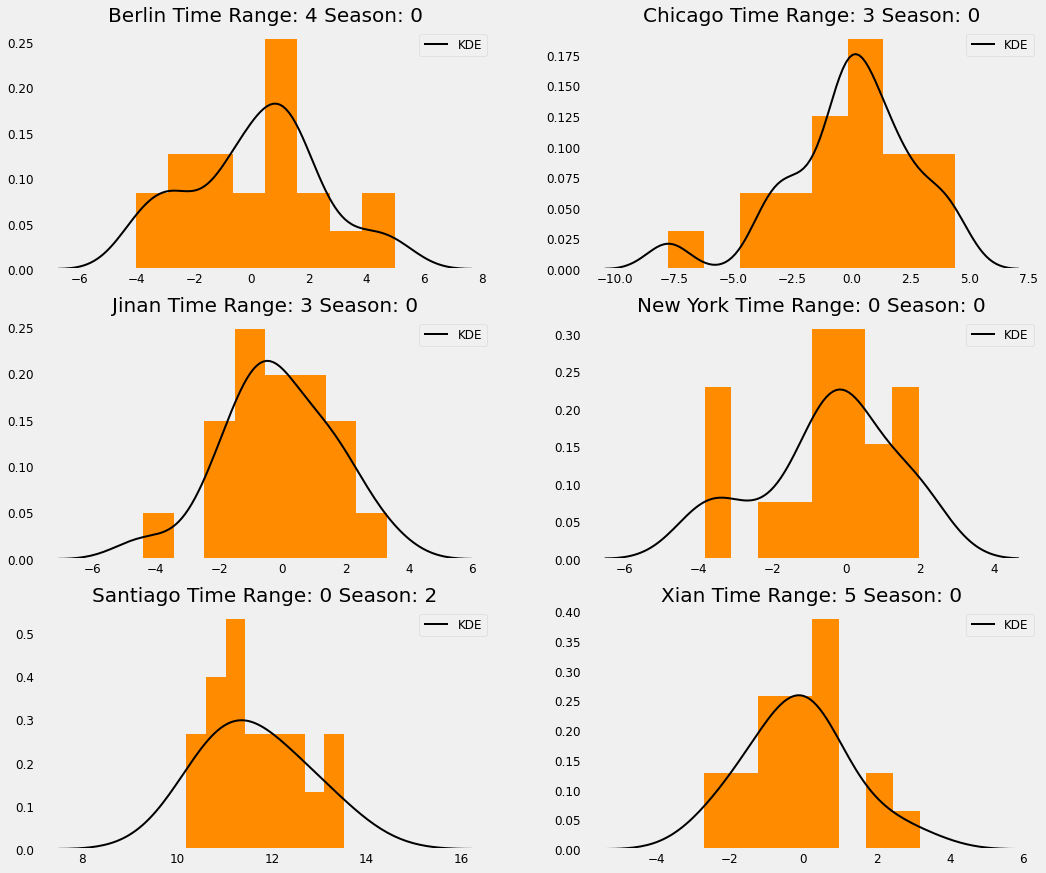

In [773]:
sum_drop=summary_data.drop_duplicates(subset='CITY').reset_index()
k=1
plt.subplots_adjust(top=2.)
for i in range(len(sum_drop)):
    ist=sum_drop.loc[i]
    dat=df[(df['City']==ist.CITY) & (df['year'].isin(range_to_years(ist['Time-range']))) & (df['season']==1)]
    val=dat.AverageTemperature
    plt.subplot(4,2,k)
    plt.title(str(ist.CITY)+' Time Range: '+str(ist['Time-range'])+' Season: '+ str(ist['Season']),fontsize=20)
    sns.kdeplot(val,label='KDE',bw=0.9,color='k')
    plt.hist(val,density=True,color='darkorange',bins=8)
    k=k+1

# 15% 

In [774]:
KS_tot_clean=[]
KS_tot_season=[]
for s in range(len(SEASON)):
    df_sea=df[df['season']==s+1]
    KS_clean=[]
    KS_season=[]
    for y in range(len(YEARS)-1):
        df_sea_y=df_sea[df_sea.year.isin(np.arange(YEARS[y],YEARS[y+1]))]
        CITIES=df_sea_y.City.drop_duplicates().tolist()
        #print(CITIES)
        KS=[]
        P_KS=[]
        for c in CITIES:
            df_c=np.array(df_sea_y[df_sea_y['City']==c].AverageTemperature)
            KS.append(kstest(df_c,'norm')[0])
            P_KS.append(kstest(df_c,'norm')[1])
        P_KS=np.array(P_KS)
        KS_data=pd.DataFrame({'City':CITIES,'KS':KS,'P-value KS':P_KS})
        KS_clean.append(KS_data[KS_data['P-value KS']>=0.15])
        KS_season.append(KS_data)
    KS_tot_clean.append(KS_clean)
    KS_tot_season.append(KS_season)

In [775]:
CITIES=df.City.drop_duplicates().tolist()

In [776]:
gaus_city=[]
when=[]
which_season=[]
for c in CITIES:
    for i in range(len(KS_tot_clean)):
        for j in range(len(KS_tot_clean[i])):
            if c in (KS_tot_clean[i][j].City.tolist()):
                gaus_city.append(c)
                when.append(j)
                which_season.append(i)

In [777]:
summary_data=pd.DataFrame({'CITY':gaus_city,'Time-range':when,'Season':which_season})

In [778]:
sum_drop=summary_data.drop_duplicates(subset='CITY',keep='first').reset_index()


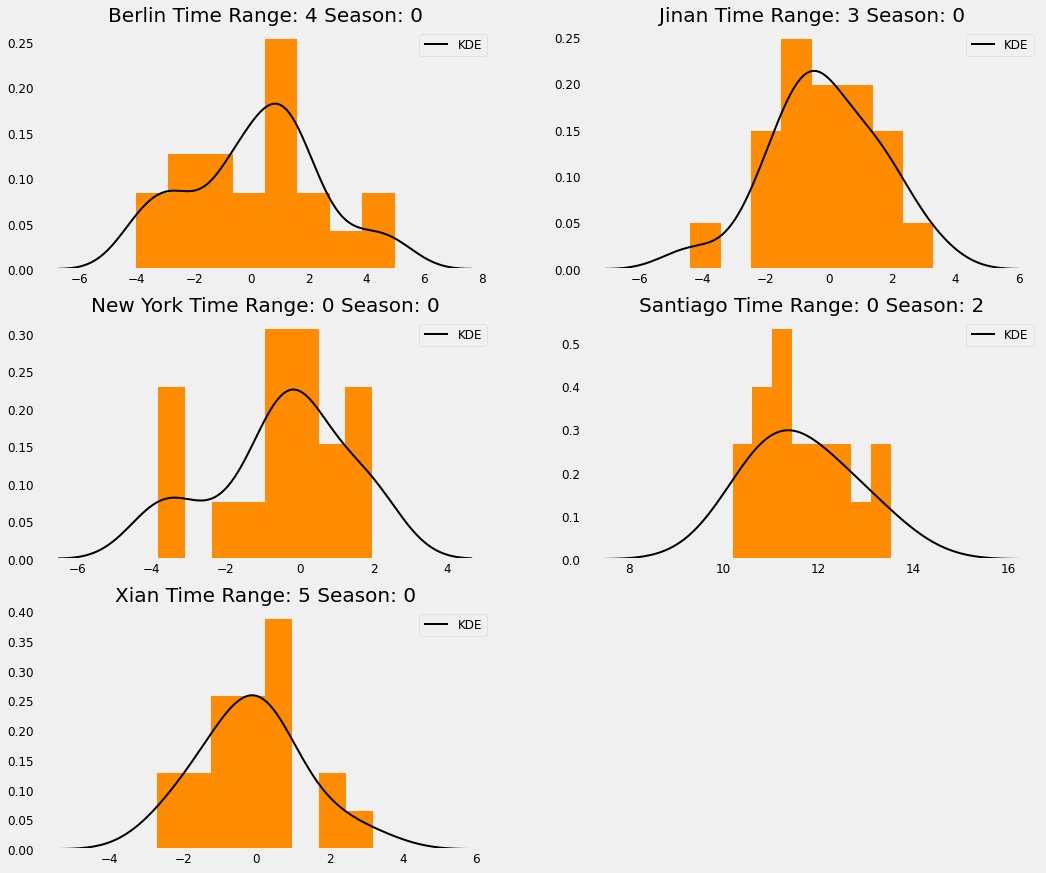

In [779]:
sum_drop=summary_data.drop_duplicates(subset='CITY').reset_index()
k=1
plt.subplots_adjust(top=2.)
for i in range(len(sum_drop)):
    ist=sum_drop.loc[i]
    dat=df[(df['City']==ist.CITY) & (df['year'].isin(range_to_years(ist['Time-range']))) & (df['season']==1)]
    val=dat.AverageTemperature
    plt.subplot(4,2,k)
    plt.title(str(ist.CITY)+' Time Range: '+str(ist['Time-range'])+' Season: '+ str(ist['Season']),fontsize=20)
    sns.kdeplot(val,label='KDE',bw=0.9,color='k')
    plt.hist(val,density=True,color='darkorange',bins=8)
    k=k+1

# 20%

In [780]:
KS_tot_clean=[]
KS_tot_season=[]
for s in range(len(SEASON)):
    df_sea=df[df['season']==s+1]
    KS_clean=[]
    KS_season=[]
    for y in range(len(YEARS)-1):
        df_sea_y=df_sea[df_sea.year.isin(np.arange(YEARS[y],YEARS[y+1]))]
        CITIES=df_sea_y.City.drop_duplicates().tolist()
        #print(CITIES)
        KS=[]
        P_KS=[]
        for c in CITIES:
            df_c=np.array(df_sea_y[df_sea_y['City']==c].AverageTemperature)
            KS.append(kstest(df_c,'norm')[0])
            P_KS.append(kstest(df_c,'norm')[1])
        P_KS=np.array(P_KS)
        KS_data=pd.DataFrame({'City':CITIES,'KS':KS,'P-value KS':P_KS})
        KS_clean.append(KS_data[KS_data['P-value KS']>=0.2])
        KS_season.append(KS_data)
    KS_tot_clean.append(KS_clean)
    KS_tot_season.append(KS_season)

In [781]:
CITIES=df.City.drop_duplicates().tolist()

In [782]:
gaus_city=[]
when=[]
which_season=[]
for c in CITIES:
    for i in range(len(KS_tot_clean)):
        for j in range(len(KS_tot_clean[i])):
            if c in (KS_tot_clean[i][j].City.tolist()):
                gaus_city.append(c)
                when.append(j)
                which_season.append(i)

In [783]:
summary_data=pd.DataFrame({'CITY':gaus_city,'Time-range':when,'Season':which_season})

In [784]:
sum_drop=summary_data.drop_duplicates(subset='CITY',keep='first').reset_index()


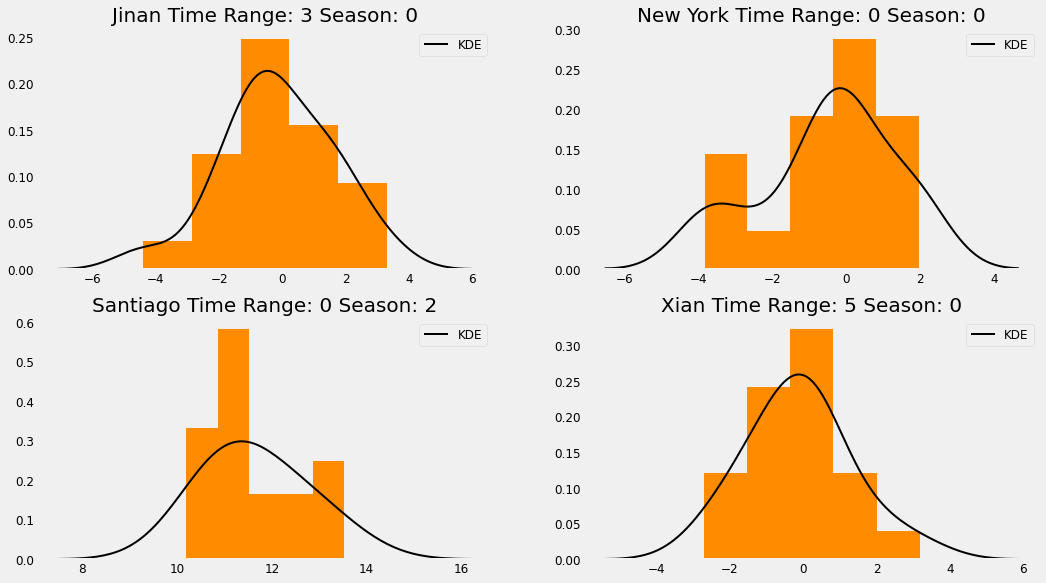

In [787]:
sum_drop=summary_data.drop_duplicates(subset='CITY').reset_index()
k=1
plt.subplots_adjust(top=2.)
for i in range(len(sum_drop)):
    ist=sum_drop.loc[i]
    dat=df[(df['City']==ist.CITY) & (df['year'].isin(range_to_years(ist['Time-range']))) & (df['season']==1)]
    val=dat.AverageTemperature
    plt.subplot(4,2,k)
    plt.title(str(ist.CITY)+' Time Range: '+str(ist['Time-range'])+' Season: '+ str(ist['Season']),fontsize=20)
    sns.kdeplot(val,label='KDE',bw=0.9,color='k')
    plt.hist(val,density=True,color='darkorange',bins=5)
    k=k+1